<a href="https://colab.research.google.com/github/RexGod/Training-cifar10-dataset-by-fully-connected-nueral_Network/blob/main/Ex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section 

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets,models,layers
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.layers import Conv2D, Flatten, Dense


Load cifar10 Data

In [32]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#len(x_train)
#len(y_train)

create Validation Data via 20% of Train Data (1000)

In [33]:
# size of data for validation data
validation_data_size = int(len(x_train) * 0.2)

# Generate random validation data from train data
random_select = np.random.choice(len(x_train), size=validation_data_size, replace=False)

# Select the validation data based on the random_select
validation_data_x = x_train[random_select]
validation_data_y = y_train[random_select]

# Remove the selected validation data from the training data
x_train = np.delete(x_train, random_select, axis=0)
y_train = np.delete(y_train, random_select, axis=0)
len(validation_data_x)
#len(x_train)
#len(validation_data_y)

10000

Normalizing Train_data

In [34]:
x_train = x_train /255

In [35]:
validation_data_x = validation_data_x/255

Convert labels to categorical

In [36]:
y_train_to_categorical = keras.utils.to_categorical(
    y_train, num_classes=len(y_train), dtype='float32'
)

CNN Model

In [37]:
cnn_model = models.Sequential()

add a convolution layer 
Reference: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [38]:
from keras.layers.reshaping.flatten import Flatten
from keras.layers.core.dense import Dense

cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(Dense(10,activation='softmax'))

Compile Model

In [39]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Use Fit

In [40]:
nemudar=cnn_model.fit(x_train,y_train,validation_data=(validation_data_x,validation_data_y), epochs = 20)

Epoch 1/20
1250/1250 [==============================] - 11s 7ms/step - loss: 1.8850 - accuracy: 0.2795 - val_loss: 1.5698 - val_accuracy: 0.4144
Epoch 2/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5454 - accuracy: 0.4324 - val_loss: 1.3873 - val_accuracy: 0.4916
Epoch 3/20
1250/1250 [==============================] - 8s 6ms/step - loss: 1.3279 - accuracy: 0.5268 - val_loss: 1.2148 - val_accuracy: 0.5726
Epoch 4/20
1250/1250 [==============================] - 8s 7ms/step - loss: 1.1271 - accuracy: 0.6019 - val_loss: 1.1475 - val_accuracy: 0.5945
Epoch 5/20
1250/1250 [==============================] - 8s 7ms/step - loss: 0.9448 - accuracy: 0.6658 - val_loss: 1.1608 - val_accuracy: 0.6099
Epoch 6/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.7936 - accuracy: 0.7267 - val_loss: 1.2156 - val_accuracy: 0.6103
Epoch 7/20
1250/1250 [==============================] - 9s 7ms/step - loss: 0.6675 - accuracy: 0.7725 - val_loss: 1.2035 - val_accuracy

In [41]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               12845568  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 256)              

Text(0.5, 1.0, 'val_loss')

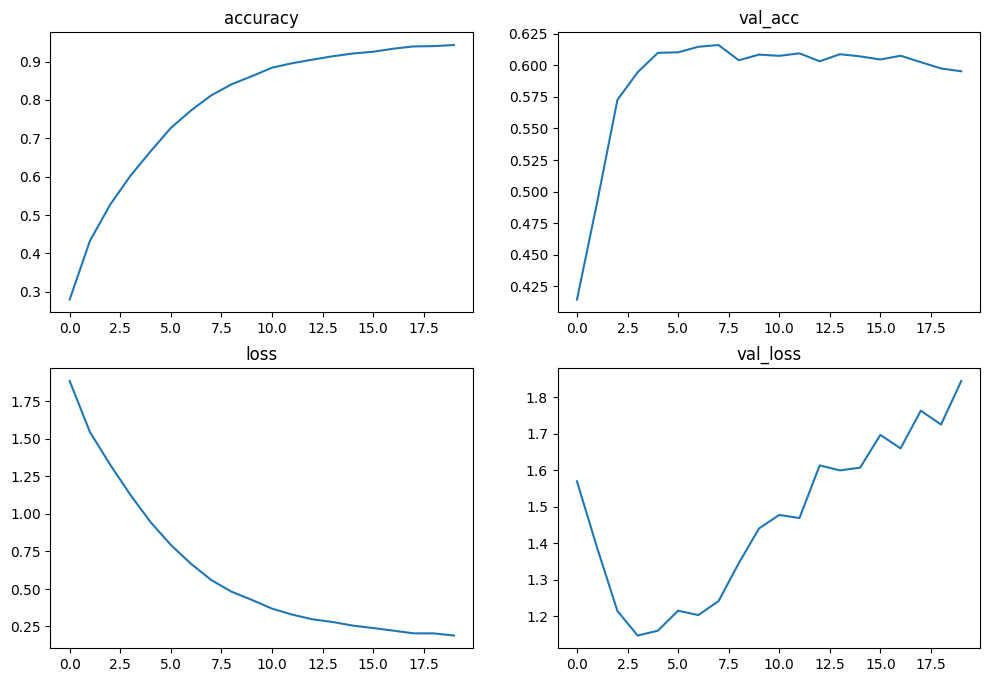

In [43]:

plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(nemudar.history['accuracy'])
plt.title('accuracy')
plt.subplot(2,2,2)
plt.plot(nemudar.history['val_accuracy'])
plt.title('val_acc')
plt.subplot(2,2,3)
plt.plot(nemudar.history['loss'])
plt.title('loss')
plt.subplot(2,2,4)
plt.plot(nemudar.history['val_loss'])
plt.title('val_loss')

Overfitt accured